In [ ]:
import yfinance as yahoo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as stats

#Manually Reading in Data

In [ ]:
djia = yahoo.Ticker("^DJI")
djia_data = djia.history(period = "2y")
djia_data.to_csv("djia_data.csv")

stock_ticks = ["AAPL", "AMGN", "AXP", "BA", "CAT", "CRM", "CSCO", "CVX", "DIS",
               "DOW", "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "MCD",
               "MMM", "MRK", "MSFT", "NKE", "PG", "TRV", "UNH", "V", "VZ",
               "WBA", "WMT", "XOM"]


indv_stocks = yahoo.download(stock_ticks, period="2y")
indv_stocks.to_csv("indv_stocks.csv")

market_cap = pd.DataFrame(columns=["Ticker", "Market Cap"])
for tick in stock_ticks:
    ticker = yahoo.Ticker(tick)
    cap = ticker.info["marketCap"]
    market_cap.loc[len(market_cap)] = [tick, cap]

[*********************100%***********************]  30 of 30 completed


In [ ]:
djia_dataset = pd.read_csv("djia_data.csv")
indv_stocks_data = pd.read_csv("indv_stocks.csv")

#Background Information on the DOW

May 26th, 1896, marked the day when the Down Jones Industrial Average was published by two financial reported, Charles Dow and Edward Jones. The creation of the index allowed for Charles Down and Edward Jones to report the overall health of the stock market to investors during a time when truthful and unbiased company financial information was sparse. According to Investopedia, “the index followed the 12 largest companies in each sector of the U.S. stock market at the time” ([Investopedia - When was the DOW created?](https://www.investopedia.com/ask/answers/100214/when-did-dow-jones-industrial-average-djia-begin.asp#:~:text=The%20index%20followed%20the%2012%20largest%20companies%C2%A0in%20each%20sector%20of%20the%20U.S.%20stock%20market%20at%20that%20time.%20The%20first%20published%20value%20of%20the%20Dow%20Jones%20was%2040.94)). Currently, there are three ways to weigh the importance of stocks: by market cap, overall stock price, and equal weights across stocks. The most common way is by market cap but due to the lack of information at the time, the DOW weighs stocks based on stock price ([Investopedia - What the DOW Means and How it is Calculated](https://www.investopedia.com/articles/investing/082714/what-dow-means-and-why-we-calculate-it-way-we-do.asp)).

#Central Argument and Question

The Dow Jones claims to give a higher weight to stocks with a higher stock price. This means that, the company’s market cap should not play a role in determining if that specific stock is affecting the overall performance of the DOW. If this is the case, then the tracked data of the historical performance of the DOW should show that individual stock price is in fact the primary indicator of the DOW’s price.

This leads to the underlying question: does market cap have a bigger influence on the DOW’s price than the individual stock prices?

#Check Packaging

In [ ]:
indv_stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Columns: 151 entries, Price to Volume.29
dtypes: object(151)
memory usage: 594.7+ KB


In [ ]:
indv_stocks_data.shape

(504, 151)

In [ ]:
djia_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          502 non-null    object 
 1   Open          502 non-null    float64
 2   High          502 non-null    float64
 3   Low           502 non-null    float64
 4   Close         502 non-null    float64
 5   Volume        502 non-null    int64  
 6   Dividends     502 non-null    float64
 7   Stock Splits  502 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 31.5+ KB


In [ ]:
market_cap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ticker      30 non-null     object
 1   Market Cap  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


In [ ]:
indv_stocks_data.head()

,Price,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,Close.7,Close.8,...,Volume.20,Volume.21,Volume.22,Volume.23,Volume.24,Volume.25,Volume.26,Volume.27,Volume.28,Volume.29
0,Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,XOM
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-05-01,167.89678955078125,224.28952026367188,155.37254333496094,203.8699951171875,209.9087371826172,196.3828125,44.572967529296875,153.92771911621094,100.9627456665039,...,21294100,4112600,3844600,761700,2105600,4571100,17043500,5128200,11409600,17355000
3,2023-05-02,166.8572998046875,221.5386962890625,149.45294189453125,203.25,207.8605194091797,192.46092224121094,43.65024185180664,147.30084228515625,99.37239074707031,...,26404400,3831600,5262900,1236500,2152300,5244000,17268700,8990100,11329500,24324100
4,2023-05-03,165.77818298339844,215.28598022460938,148.43870544433594,200.92999267578125,208.3339385986328,191.23968505859375,43.273624420166016,144.3463592529297,99.62921905517578,...,22360800,4560100,5775000,1001700,1749700,4093300,16703200,14148900,12334500,16212300


In [ ]:
indv_stocks_data.dtypes

,0
Price,object
Close,object
Close.1,object
Close.2,object
Close.3,object
...,...
Volume.25,object
Volume.26,object
Volume.27,object
Volume.28,object


In [ ]:
djia_dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-05-01 00:00:00-04:00,34116.808594,34257.828125,34030.140625,34051.699219,244190000,0.0,0.0
1,2023-05-02 00:00:00-04:00,34017.621094,34017.750000,33436.660156,33684.531250,274460000,0.0,0.0
2,2023-05-03 00:00:00-04:00,33726.640625,33811.839844,33396.050781,33414.238281,286900000,0.0,0.0
3,2023-05-04 00:00:00-04:00,33347.781250,33354.859375,32937.500000,33127.738281,305160000,0.0,0.0
4,2023-05-05 00:00:00-04:00,33248.550781,33748.429688,33248.550781,33674.378906,316350000,0.0,0.0


In [ ]:
djia_dataset.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
497,2025-04-24 00:00:00-04:00,39531.050781,40157.910156,39371.871094,40093.398438,558120000,0.0,0.0
498,2025-04-25 00:00:00-04:00,40045.730469,40137.308594,39718.679688,40113.500000,559040000,0.0,0.0
499,2025-04-28 00:00:00-04:00,40171.738281,40414.179688,39869.101562,40227.589844,475930000,0.0,0.0
500,2025-04-29 00:00:00-04:00,40233.980469,40630.488281,40222.179688,40527.621094,434830000,0.0,0.0
501,2025-04-30 00:00:00-04:00,40290.398438,40777.160156,39745.628906,40669.359375,599883625,0.0,0.0


In [ ]:
market_cap.head()

,Ticker,Market Cap
0,AAPL,3192196431872
1,AMGN,156413444096
2,AXP,186643922944
3,BA,138164060160
4,CAT,147810025472


#Cleaning the data

In [ ]:
dates_column = indv_stocks_data.iloc[2:, 0].copy()
dates_column = pd.to_datetime(dates_column)

In [ ]:
close_columns = [
    column for column in indv_stocks_data.columns if column.startswith("Close")
]
indv_stocks_data = indv_stocks_data[close_columns]
indv_stocks_data

,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,Close.7,Close.8,Close.9,...,Close.20,Close.21,Close.22,Close.23,Close.24,Close.25,Close.26,Close.27,Close.28,Close.29
0,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,XOM
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,167.89678955078125,224.28952026367188,155.37254333496094,203.8699951171875,209.9087371826172,196.3828125,44.572967529296875,153.92771911621094,100.9627456665039,48.354915618896484,...,300.7762451171875,123.88484191894531,149.0149688720703,174.7140655517578,480.4788818359375,228.9913787841797,33.75828552246094,30.241004943847656,49.2476921081543,107.09370422363281
3,166.8572998046875,221.5386962890625,149.45294189453125,203.25,207.8605194091797,192.46092224121094,43.65024185180664,147.30084228515625,99.37239074707031,48.06001281738281,...,300.6286315917969,123.24565887451172,148.8817138671875,173.53173828125,478.2398376464844,223.54507446289062,32.851322174072266,29.27112579345703,49.114498138427734,102.82563781738281
4,165.77818298339844,215.28598022460938,148.43870544433594,200.92999267578125,208.3339385986328,191.23968505859375,43.273624420166016,144.3463592529297,99.62921905517578,47.362972259521484,...,299.6344299316406,122.74205017089844,148.6913604736328,172.20521545410156,474.4111022949219,222.56019592285156,33.12166976928711,27.925527572631836,48.93257522583008,100.79902648925781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,208.3699951171875,279.8399963378906,267.32000732421875,176.25999450683594,306.8599853515625,264.70001220703125,56.290000915527344,139.07000732421875,90.01000213623047,29.760000228881836,...,387.29998779296875,58.47999954223633,159.52999877929688,260.3999938964844,424.25,335.7099914550781,42.810001373291016,11.029999732971191,95.83999633789062,108.62999725341797
500,209.27999877929688,280.8399963378906,264.80999755859375,177.9499969482422,306.45001220703125,267.8500061035156,56.709999084472656,138.72999572753906,90.27999877929688,30.020000457763672,...,391.8500061035156,57.619998931884766,161.02000427246094,259.1600036621094,418.6400146484375,335.1700134277344,41.90999984741211,11.010000228881836,95.08999633789062,108.56999969482422
501,210.13999938964844,283.0899963378906,264.95001220703125,182.3000030517578,307.05999755859375,265.6400146484375,56.84000015258789,140.10000610351562,90.16000366210938,29.950000762939453,...,391.1600036621094,57.310001373291016,161.85000610351562,261.6099853515625,420.0,337.510009765625,42.38999938964844,10.970000267028809,95.22000122070312,108.62999725341797
502,211.2100067138672,288.55999755859375,267.0199890136719,182.0,307.3999938964844,267.760009765625,57.34000015258789,139.3000030517578,91.16999816894531,30.649999618530273,...,394.0400085449219,57.540000915527344,162.25999450683594,264.04998779296875,409.2300109863281,341.5199890136719,42.95000076293945,10.930000305175781,96.04000091552734,108.36000061035156


In [ ]:
tickers = indv_stocks_data.iloc[0, :].values
indv_stocks_data = indv_stocks_data.drop(index= [0, 1])
indv_stocks_data = indv_stocks_data.set_index(dates_column.iloc[0:].copy())
indv_stocks_data.columns = tickers
indv_stocks_data.index.name = "Dates"
indv_stocks_data.index = pd.to_datetime(indv_stocks_data.index).tz_localize(None).normalize()

In [ ]:
indv_stocks_data

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,XOM
Dates,,,,,,,,,,,,,,,,,,,,,
2023-05-01,167.89678955078125,224.28952026367188,155.37254333496094,203.8699951171875,209.9087371826172,196.3828125,44.572967529296875,153.92771911621094,100.9627456665039,48.354915618896484,...,300.7762451171875,123.88484191894531,149.0149688720703,174.7140655517578,480.4788818359375,228.9913787841797,33.75828552246094,30.241004943847656,49.2476921081543,107.09370422363281
2023-05-02,166.8572998046875,221.5386962890625,149.45294189453125,203.25,207.8605194091797,192.46092224121094,43.65024185180664,147.30084228515625,99.37239074707031,48.06001281738281,...,300.6286315917969,123.24565887451172,148.8817138671875,173.53173828125,478.2398376464844,223.54507446289062,32.851322174072266,29.27112579345703,49.114498138427734,102.82563781738281
2023-05-03,165.77818298339844,215.28598022460938,148.43870544433594,200.92999267578125,208.3339385986328,191.23968505859375,43.273624420166016,144.3463592529297,99.62921905517578,47.362972259521484,...,299.6344299316406,122.74205017089844,148.6913604736328,172.20521545410156,474.4111022949219,222.56019592285156,33.12166976928711,27.925527572631836,48.93257522583008,100.79902648925781
2023-05-04,164.1347198486328,217.7082061767578,145.1229705810547,197.0500030517578,203.25213623046875,191.01133728027344,43.02882385253906,143.784912109375,96.26083374023438,47.684688568115234,...,300.6286315917969,119.76889038085938,148.006103515625,172.19564819335938,472.3173828125,222.18594360351562,32.57225799560547,27.567285537719727,49.06953430175781,99.03388977050781
2023-05-05,171.8370819091797,222.06446838378906,148.8677978515625,198.33999633789062,207.8025665283203,196.1842498779297,43.54667282104492,147.4573211669922,99.29336547851562,48.623008728027344,...,305.78656005859375,122.59678649902344,148.50100708007812,175.2331085205078,479.10247802734375,228.2724151611328,32.99085235595703,28.10901641845703,49.49348068237305,101.49948120117188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,208.3699951171875,279.8399963378906,267.32000732421875,176.25999450683594,306.8599853515625,264.70001220703125,56.290000915527344,139.07000732421875,90.01000213623047,29.760000228881836,...,387.29998779296875,58.47999954223633,159.52999877929688,260.3999938964844,424.25,335.7099914550781,42.810001373291016,11.029999732971191,95.83999633789062,108.62999725341797
2025-04-25,209.27999877929688,280.8399963378906,264.80999755859375,177.9499969482422,306.45001220703125,267.8500061035156,56.709999084472656,138.72999572753906,90.27999877929688,30.020000457763672,...,391.8500061035156,57.619998931884766,161.02000427246094,259.1600036621094,418.6400146484375,335.1700134277344,41.90999984741211,11.010000228881836,95.08999633789062,108.56999969482422
2025-04-28,210.13999938964844,283.0899963378906,264.95001220703125,182.3000030517578,307.05999755859375,265.6400146484375,56.84000015258789,140.10000610351562,90.16000366210938,29.950000762939453,...,391.1600036621094,57.310001373291016,161.85000610351562,261.6099853515625,420.0,337.510009765625,42.38999938964844,10.970000267028809,95.22000122070312,108.62999725341797


In [ ]:
print(indv_stocks_data.columns.value_counts())

AAPL    1
AMGN    1
AXP     1
BA      1
CAT     1
CRM     1
CSCO    1
CVX     1
DIS     1
DOW     1
GS      1
HD      1
HON     1
IBM     1
INTC    1
JNJ     1
JPM     1
MCD     1
MMM     1
MRK     1
MSFT    1
NKE     1
PG      1
TRV     1
UNH     1
V       1
VZ      1
WBA     1
WMT     1
XOM     1
Name: count, dtype: int64


In [ ]:
djia_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          502 non-null    object 
 1   Open          502 non-null    float64
 2   High          502 non-null    float64
 3   Low           502 non-null    float64
 4   Close         502 non-null    float64
 5   Volume        502 non-null    int64  
 6   Dividends     502 non-null    float64
 7   Stock Splits  502 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 31.5+ KB


In [ ]:
indv_stocks_data = indv_stocks_data.astype("float")

dija_dates = djia_dataset["Date"] = pd.to_datetime(djia_dataset["Date"])
djia_dataset = djia_dataset.set_index("Date")
djia_dataset.index = pd.to_datetime(djia_dataset.index, utc=True).tz_convert(None).normalize()

<ipython-input-854-efdf0965b564>:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  dija_dates = djia_dataset["Date"] = pd.to_datetime(djia_dataset["Date"])


In [ ]:
print(indv_stocks_data.info())
print("-----------------------------------------------------------------------")
print(djia_dataset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-05-01 to 2025-04-30
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    502 non-null    float64
 1   AMGN    502 non-null    float64
 2   AXP     502 non-null    float64
 3   BA      502 non-null    float64
 4   CAT     502 non-null    float64
 5   CRM     502 non-null    float64
 6   CSCO    502 non-null    float64
 7   CVX     502 non-null    float64
 8   DIS     502 non-null    float64
 9   DOW     502 non-null    float64
 10  GS      502 non-null    float64
 11  HD      502 non-null    float64
 12  HON     502 non-null    float64
 13  IBM     502 non-null    float64
 14  INTC    502 non-null    float64
 15  JNJ     502 non-null    float64
 16  JPM     502 non-null    float64
 17  MCD     502 non-null    float64
 18  MMM     502 non-null    float64
 19  MRK     502 non-null    float64
 20  MSFT    502 non-null    float64
 21  NKE     502 non-null

In [ ]:
market_cap = market_cap.sort_values(by= "Market Cap", ascending= False)
market_cap["Ticker"] = market_cap["Ticker"].astype("string")
market_cap

,Ticker,Market Cap
0,AAPL,3192196431872
20,MSFT,2938355056640
28,WMT,778086514688
16,JPM,679823409152
25,V,666472939520
29,XOM,456880357376
22,PG,381151870976
15,JNJ,376092786688
24,UNH,374502555648
11,HD,358301106176


In [ ]:
big_cap = market_cap[market_cap["Market Cap"] >= 250000000000]
med_cap = market_cap[(market_cap["Market Cap"] >= 125000000000) & (market_cap["Market Cap"] < 250000000000)]
small_cap = market_cap[market_cap["Market Cap"] < 125000000000]

In [ ]:
small_tickers = small_cap["Ticker"].values
large_tickers = big_cap["Ticker"].values
med_tickers = med_cap["Ticker"].values
small_stocks = indv_stocks_data[small_tickers]
med_stocks = indv_stocks_data[med_tickers]
large_stocks = indv_stocks_data[large_tickers]

In [ ]:
small_tickers

<StringArray>
['INTC', 'NKE', 'MMM', 'TRV', 'DOW', 'WBA']
Length: 6, dtype: string

In [ ]:
small_stocks

,INTC,NKE,MMM,TRV,DOW,WBA
Dates,,,,,,
2023-05-01,29.573631,123.884842,81.328781,174.714066,48.354916,30.241005
2023-05-02,29.056334,123.245659,79.123650,173.531738,48.060013,29.271126
2023-05-03,29.915243,122.742050,79.008400,172.205215,47.362972,27.925528
2023-05-04,30.615955,119.768890,78.247742,172.195648,47.684689,27.567286
2023-05-05,30.370951,122.596786,79.407928,175.233109,48.623009,28.109016
...,...,...,...,...,...,...
2025-04-24,21.490000,58.480000,138.880005,260.399994,29.760000,11.030000
2025-04-25,20.049999,57.619999,137.320007,259.160004,30.020000,11.010000
2025-04-28,20.510000,57.310001,137.929993,261.609985,29.950001,10.970000


In [ ]:
large_stocks

,AAPL,MSFT,WMT,JPM,V,XOM,PG,JNJ,UNH,HD,CRM
Dates,,,,,,,,,,,
2023-05-01,167.896790,300.776245,49.247692,134.436310,228.991379,107.093704,149.014969,153.785141,480.478882,282.967133,196.382812
2023-05-02,166.857300,300.628632,49.114498,132.265549,223.545074,102.825638,148.881714,155.129333,478.239838,279.716309,192.460922
2023-05-03,165.778183,299.634430,48.932575,129.466385,222.560196,100.799026,148.691360,153.098907,474.411102,278.575684,191.239685
2023-05-04,164.134720,300.628632,49.069534,127.695465,222.185944,99.033890,148.006104,152.403305,472.317383,271.608459,191.011337
2023-05-05,171.837082,305.786560,49.493481,130.189987,228.272415,101.499481,148.501007,152.920303,479.102478,275.286987,196.184250
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,208.369995,387.299988,95.839996,244.639999,335.709991,108.629997,159.529999,154.929993,424.250000,359.640015,264.700012
2025-04-25,209.279999,391.850006,95.089996,243.550003,335.170013,108.570000,161.020004,154.580002,418.640015,357.579987,267.850006
2025-04-28,210.139999,391.160004,95.220001,243.220001,337.510010,108.629997,161.850006,155.350006,420.000000,356.920013,265.640015


In [ ]:
med_stocks

,CVX,CSCO,MCD,IBM,MRK,AXP,VZ,GS,DIS,AMGN,CAT,BA,HON
Dates,,,,,,,,,,,,,
2023-05-01,153.927719,44.572968,284.107117,116.580391,109.982155,155.372543,33.758286,323.006317,100.962746,224.289520,209.908737,203.869995,192.037292
2023-05-02,147.300842,43.650242,284.574921,115.720543,111.447441,149.452942,32.851322,316.177612,99.372391,221.538696,207.860519,203.250000,189.910782
2023-05-03,144.346359,43.273624,281.854004,114.139503,111.759407,148.438705,33.121670,311.701050,99.629219,215.285980,208.333939,200.929993,189.623413
2023-05-04,143.784912,43.028824,281.796692,113.325874,110.955864,145.122971,32.572258,304.692139,96.260834,217.708206,203.252136,197.050003,187.956665
2023-05-05,147.457321,43.546673,283.171509,114.324409,111.248909,148.867798,32.990852,310.155060,99.293365,222.064468,207.802567,198.339996,190.064026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,139.070007,56.290001,316.220001,229.330002,79.839996,267.320007,42.810001,545.369995,90.010002,279.839996,306.859985,176.259995,200.740005
2025-04-25,138.729996,56.709999,316.739990,232.410004,82.739998,264.809998,41.910000,544.859985,90.279999,280.839996,306.450012,177.949997,199.160004
2025-04-28,140.100006,56.840000,316.809998,236.160004,83.190002,264.950012,42.389999,546.400024,90.160004,283.089996,307.059998,182.300003,200.660004


#Calculating Market Weights

In [ ]:
close_data = djia_dataset["Close"]
weights = indv_stocks_data.div(close_data, axis=0)
weights.index.name = "Date"
small_weights = weights[small_tickers].sum(axis=1)
med_weights = weights[med_tickers].sum(axis=1)
large_weights = weights[large_tickers].sum(axis=1)
small_stocks.shape

(502, 6)

#Visualization of Weights

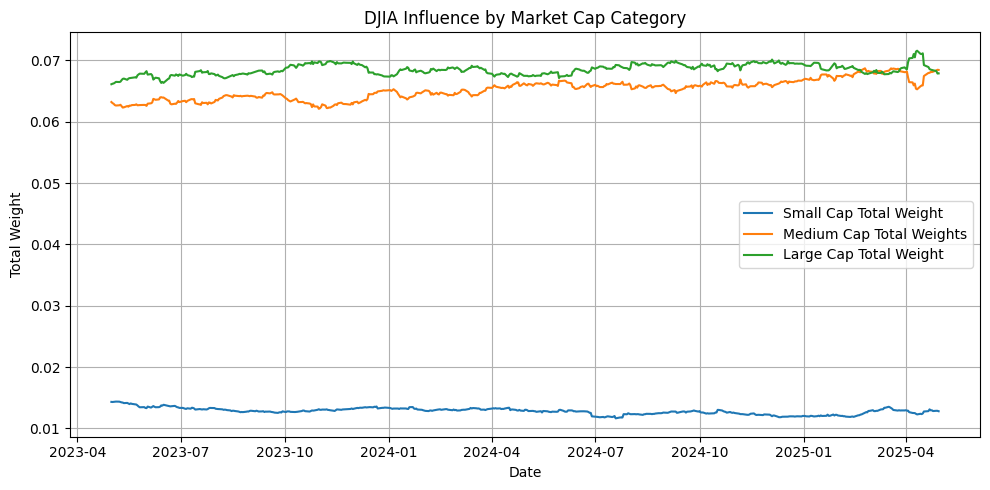

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(small_weights, label='Small Cap Total Weight')
plt.plot(med_weights, label= "Medium Cap Total Weights")
plt.plot(large_weights, label='Large Cap Total Weight')
plt.title("DJIA Influence by Market Cap Category")
plt.ylabel("Total Weight")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Visualization of Stock Weight's Correlation

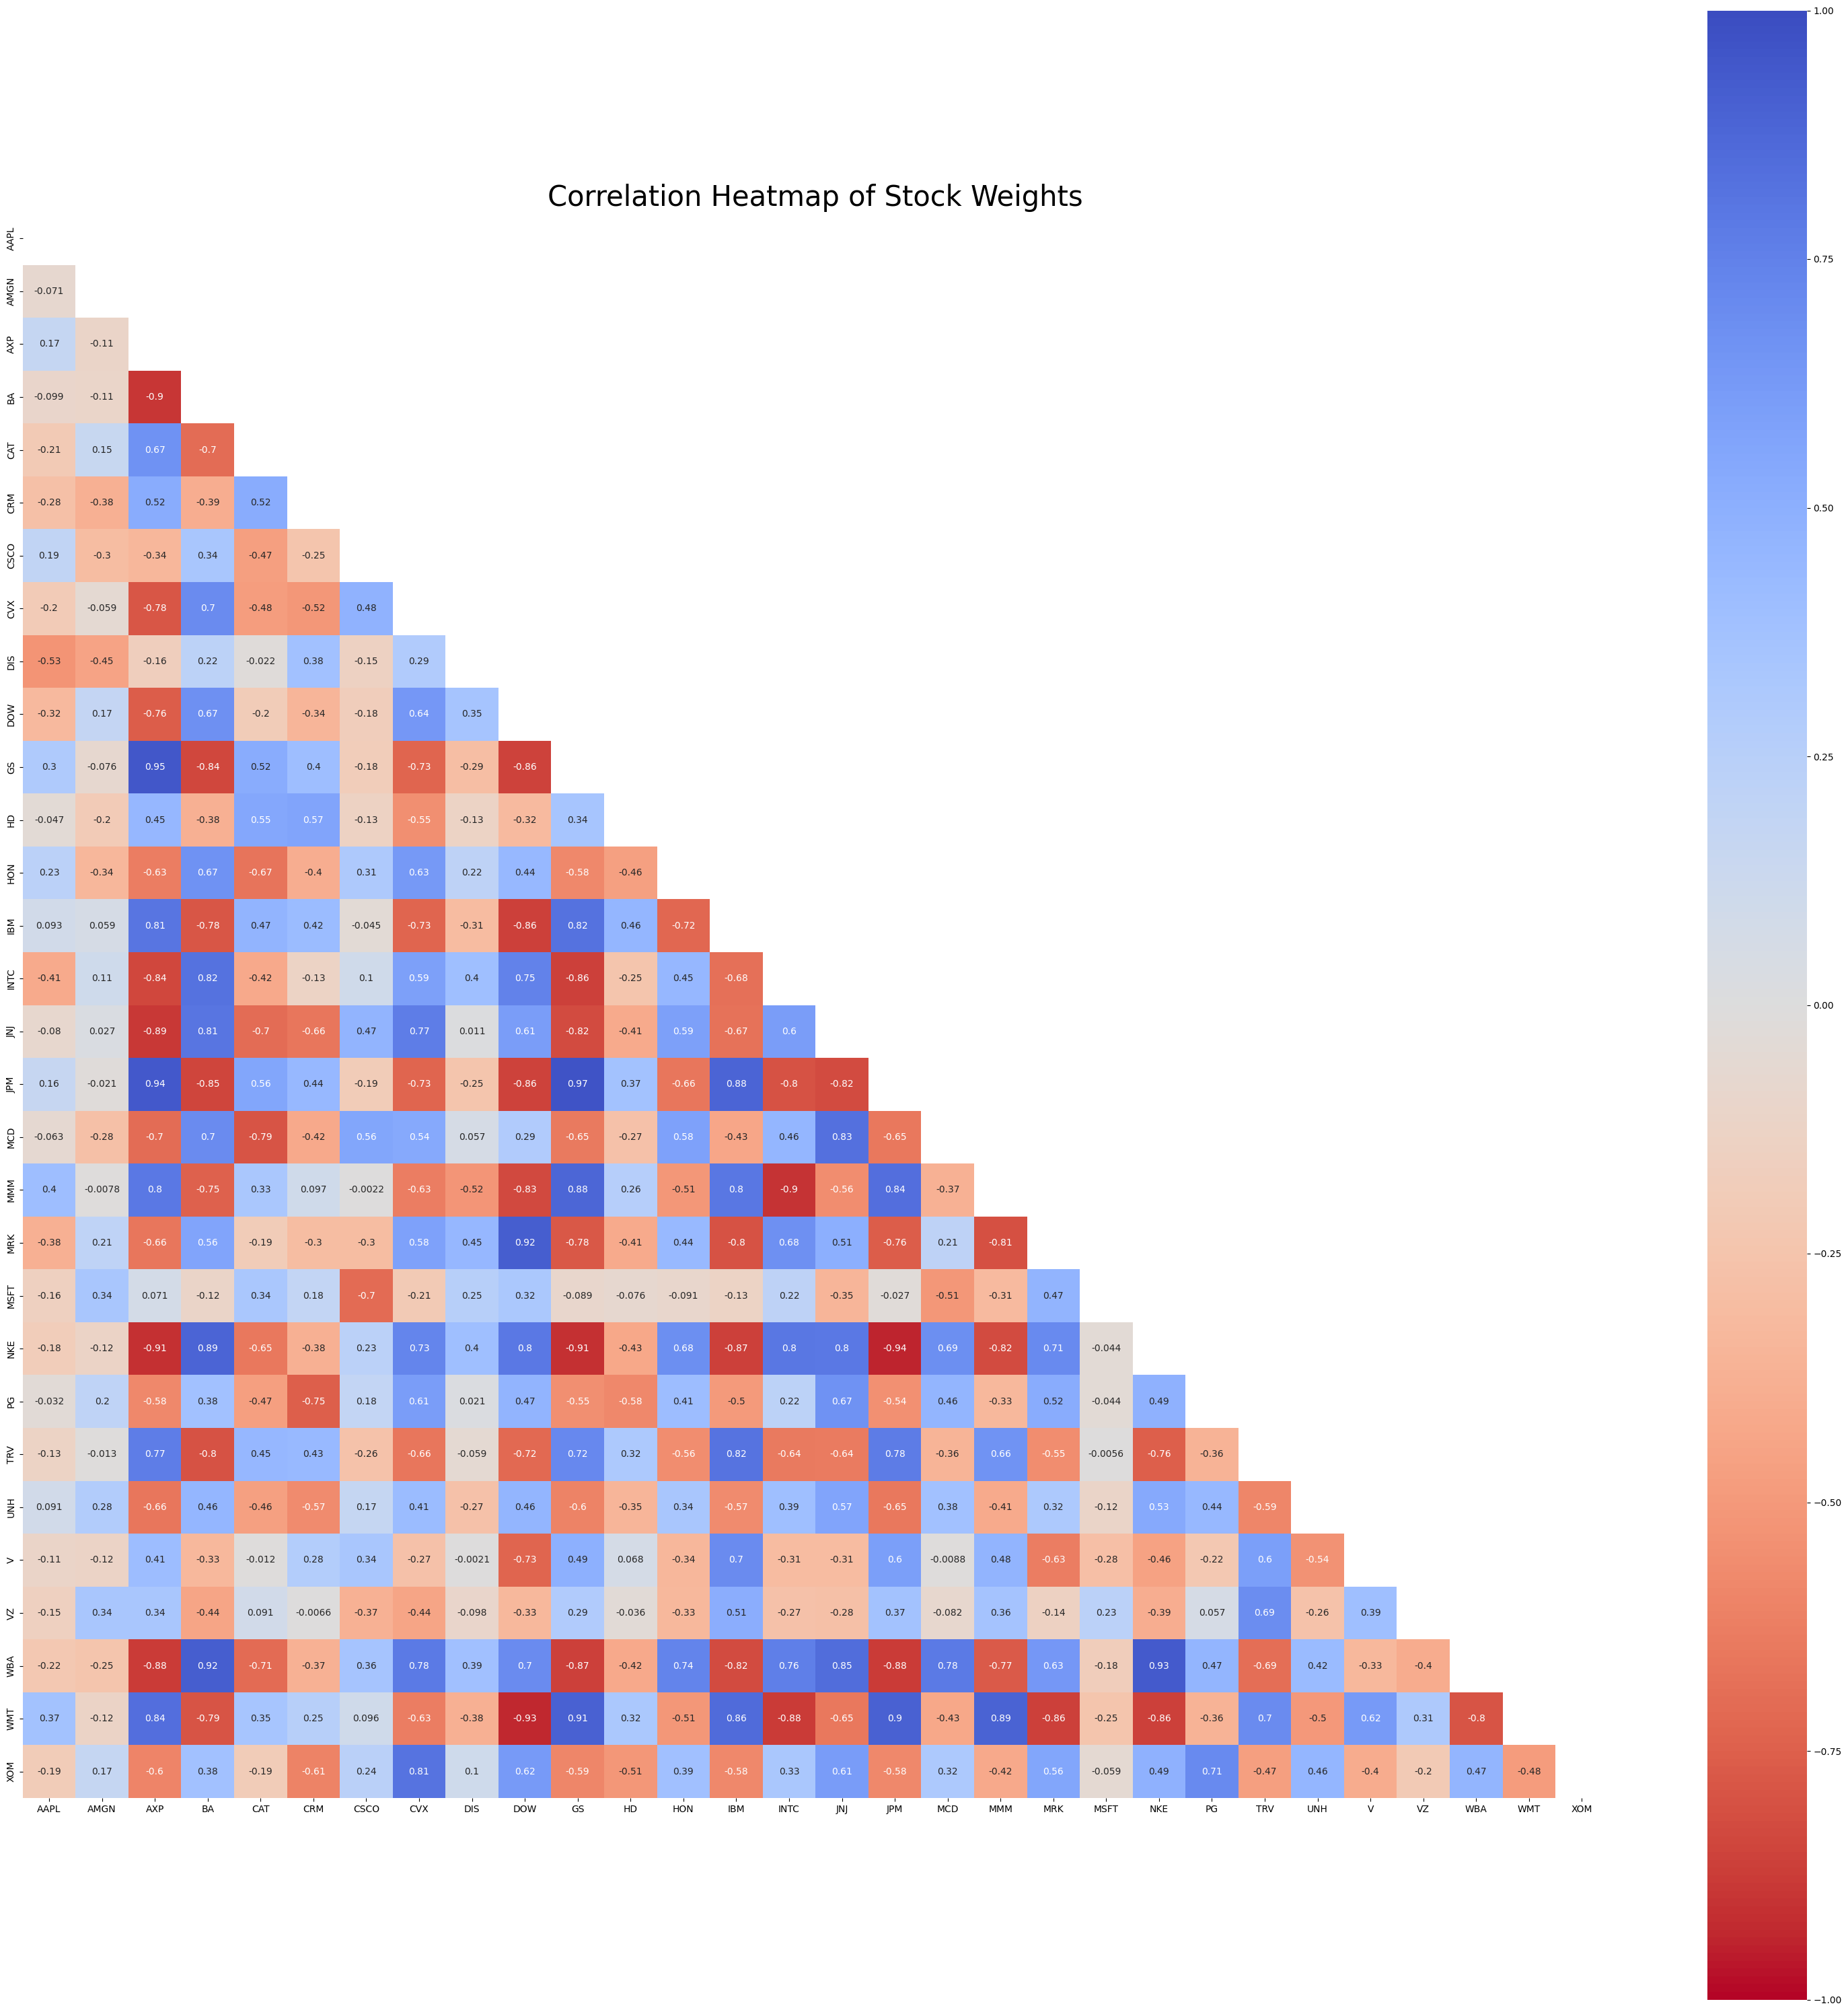

In [ ]:
correlation = weights.corr()
corr_mask = np.zeros_like(correlation)
corr_mask[np.triu_indices_from(corr_mask)] = True

f,ax = plt.subplots(1, 1, figsize= (30, 30))

sb.heatmap(correlation, vmin= -1, vmax= 1, mask= corr_mask, annot= True, square= True, ax= ax, cmap= "coolwarm_r")
plt.title("Correlation Heatmap of Stock Weights", fontsize= 30)
plt.tight_layout()
plt.show()

#Regression

In [ ]:
close_data = close_data.rename("DJIAClose")
close_and_weights = pd.concat([
    close_data,
    small_weights.rename("SmWeights"),
    med_weights.rename("MdWeights"),
    large_weights.rename("LgWeights")
], axis=1)
close_and_weights.isna().sum()

,0
DJIAClose,0
SmWeights,0
MdWeights,0
LgWeights,0


In [ ]:
combined_small = small_stocks.sum(axis= 1)
combined_med = med_stocks.sum(axis= 1)
combined_large = large_stocks.sum(axis= 1)
combined_small = combined_small.rename("SmallCombinedPrice")
combined_med = combined_med.rename("MedCombinedPrice")
combined_large = combined_large.rename("LargeCombinedPrice")

close_and_price = pd.concat([
    close_data,
    combined_small,
    combined_med,
    combined_large
], axis= 1)
close_and_price.isna().sum()

,0
DJIAClose,0
SmallCombinedPrice,0
MedCombinedPrice,0
LargeCombinedPrice,0


In [ ]:
weights_model = stats.ols(formula= "DJIAClose ~ SmWeights + MdWeights + LgWeights", data= close_and_weights).fit()
print(weights_model.summary())

                            OLS Regression Results                            
Dep. Variable:              DJIAClose   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     682.2
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          6.44e-176
Time:                        20:39:54   Log-Likelihood:                -4406.1
No. Observations:                 502   AIC:                             8820.
Df Residuals:                     498   BIC:                             8837.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.481e+05   1.15e+04    -12.912      0.0

In [ ]:
price_model = stats.ols(formula= "DJIAClose ~ SmallCombinedPrice + MedCombinedPrice + LargeCombinedPrice", data= close_and_price).fit()
print(price_model.summary())

                            OLS Regression Results                            
Dep. Variable:              DJIAClose   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.664e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:39:54   Log-Likelihood:                -3310.2
No. Observations:                 502   AIC:                             6628.
Df Residuals:                     498   BIC:                             6645.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2900.1674    146

#Visualization of Predicted Values

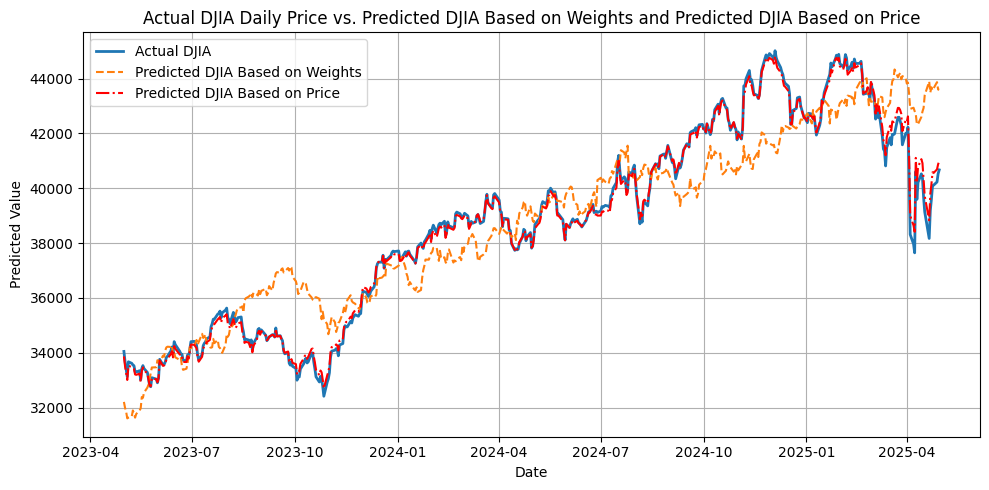

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(close_data, label='Actual DJIA', linewidth=2)
plt.plot(weights_model.fittedvalues, label='Predicted DJIA Based on Weights', linestyle='--')
plt.plot(price_model.fittedvalues, label='Predicted DJIA Based on Price', linestyle= "-.", color= "red")
plt.legend()
plt.title("Actual DJIA Daily Price vs. Predicted DJIA Based on Weights and Predicted DJIA Based on Price")
plt.xlabel("Date")
plt.ylabel("Predicted Value")
plt.grid(True)
plt.tight_layout()
plt.show()